In [53]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10


In [54]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = keras.datasets.mnist.load_data()

np.savez_compressed("mnist_train.npz", x=mnist_x_train, y=mnist_y_train)
np.savez_compressed("mnist_test.npz", x=mnist_x_test, y=mnist_y_test)

with h5py.File("mnist.h5", "w") as h5f:
    h5f.create_dataset("x_train", data=mnist_x_train)
    h5f.create_dataset("y_train", data=mnist_y_train)
    h5f.create_dataset("x_test", data=mnist_x_test)
    h5f.create_dataset("y_test", data=mnist_y_test)


(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = keras.datasets.cifar10.load_data()

np.savez_compressed("cifar10_train.npz", x=cifar_x_train, y=cifar_y_train)
np.savez_compressed("cifar10_test.npz", x=cifar_x_test, y=cifar_y_test)

with h5py.File("cifar10.h5", "w") as h5f:
    h5f.create_dataset("x_train", data=cifar_x_train)
    h5f.create_dataset("y_train", data=cifar_y_train)
    h5f.create_dataset("x_test", data=cifar_x_test)
    h5f.create_dataset("y_test", data=cifar_y_test)



170498071/170498071 [==============================] - 283s 2us/step


# Часть 1

## 1.1

### 1.1.2

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [56]:
def tanh(x):
    return np.tanh(x)

In [57]:
def relu(x):
    return max(0.0, x)

In [58]:
class Neuron:
    def __init__(self, weights, bias, activation_func):
        self.weights = weights
        self.bias = bias
        self.activation_func = activation_func

    def forward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return self.activation_func(total)

In [59]:
class NeuralNetwork:
    def __init__(self, activation_func):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0

        self.activation_func = activation_func

        self.h1 = Neuron(weights, bias, activation_func)
        self.h2 = Neuron(weights, bias, activation_func)
        self.h3 = Neuron(weights, bias, activation_func)
        self.o1 = Neuron(weights, bias, activation_func)

    def forward(self, x):
        out_h1 = self.h1.forward(x)
        out_h2 = self.h2.forward(x)
        out_h3 = self.h3.forward(x)
        out_o1 = self.o1.forward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

In [60]:
network_sigmoid = NeuralNetwork(
    activation_func=sigmoid
    )
x = np.array([2, 3, 4])

network_sigmoid.forward(x)

0.8151036049051821

In [61]:
network_tanh = NeuralNetwork(
    activation_func=tanh
    )
x = np.array([2, 3, 4])

network_tanh.forward(x)

0.9050813365686774

In [62]:
network_relu = NeuralNetwork(
    activation_func=relu
    )
x = np.array([2, 3, 4])

network_relu.forward(x)

6.75

## 1.2

### 1.2.1

In [63]:
df_iris = pd.read_csv(
    'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
    )

In [64]:
df_iris['variety'] = df_iris['variety'].replace({
    'Setosa': 1, 'Versicolor': 2, 'Virginica': 3
})

C:\Users\pyramidheadshark\AppData\Local\Temp\ipykernel_19124\2949372625.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_iris['variety'] = df_iris['variety'].replace({


In [65]:
X_iris = df_iris.drop('variety', axis=1)
y_iris = df_iris['variety']

In [66]:
X_train_iris, X_test_iris, \
y_train_iris, y_test_iris = \
    train_test_split(
        X_iris,
        y_iris,
        test_size=0.2,
        random_state=42
    )

In [67]:
df_salary = pd.read_csv(
    'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
)

In [68]:
scaler_salary = StandardScaler()

In [69]:
X_salary = df_salary[['YearsExperience']].values.reshape(-1, 1)
y_salary = df_salary['Salary']

In [70]:
X_train_salary, X_test_salary, \
y_train_salary, y_test_salary = \
    train_test_split(
        X_salary,
        y_salary,
        test_size=0.2,
        random_state=42
    )

In [71]:
X_train_salary_scaled = scaler_salary.fit_transform(X_train_salary)
X_test_salary_scaled = scaler_salary.transform(X_test_salary)

In [72]:
param_grid_salary = {
    'activation': [
        'relu', 'tanh'
        ],
}

In [73]:
clf_iris = MLPClassifier(
    hidden_layer_sizes=(100, 3),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

In [74]:
reg_salary = MLPRegressor(
    random_state=42,
)

In [75]:
reg_salary.fit(X_train_salary_scaled, y_train_salary)

c:\Users\pyramidheadshark\anaconda3\envs\DS-Practive-Sem1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

In [76]:
clf_iris.fit(X_train_iris, y_train_iris)

MLPClassifier(hidden_layer_sizes=(100, 3), max_iter=1000, random_state=42)

In [77]:
y_iris_pred = clf_iris.predict(X_test_iris)
acc_iris = accuracy_score(y_test_iris, y_iris_pred)
f1_iris = f1_score(y_test_iris, y_iris_pred, average='micro')

In [78]:
y_salary_pred = reg_salary.predict(X_test_salary_scaled)
r2_salary = r2_score(y_test_salary, y_salary_pred)
mse_salary = mean_squared_error(y_test_salary, y_salary_pred)

In [79]:
print(
    f"""Metrics for Iris Classifier:
    Accuracy: {acc_iris}
    F1 Score: {f1_iris}
    """
)

Metrics for Iris Classifier:
    Accuracy: 0.6333333333333333
    F1 Score: 0.6333333333333333
    


In [80]:
print(
    f"""Metrics for Salary Regressor:
    R2 Score: {r2_salary}
    MSE: {mse_salary}
    """
)

Metrics for Salary Regressor:
    R2 Score: -13.544755459938331
    MSE: 7429402089.348039
    


# Часть 2

## 1.1

In [106]:
X = np.random.rand(1000, 20)
y = np.random.randint(2, size=(1000,1))

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
model = keras.Sequential([
    keras.layers.Dense(256, input_dim=20, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [109]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )


In [110]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
25/25 [==============================] - 1s 10ms/step - loss: 1.0182 - accuracy: 0.4638 - val_loss: 0.9630 - val_accuracy: 0.4500
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.9205 - accuracy: 0.5175 - val_loss: 0.8770 - val_accuracy: 0.5800
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.8563 - accuracy: 0.5487 - val_loss: 0.8354 - val_accuracy: 0.4950
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 0.8099 - accuracy: 0.5387 - val_loss: 0.7903 - val_accuracy: 0.5850
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.7837 - accuracy: 0.5238 - val_loss: 0.7693 - val_accuracy: 0.5200
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.7619 - accuracy: 0.5213 - val_loss: 0.7509 - val_accuracy: 0.5250
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.7426 - accuracy: 0.5475 - val_loss: 0.7481 - val_accuracy: 0.4900
Epoch 8/30
25/25 [=

In [111]:
loss, accuracy = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.5200


In [112]:
print(
    f'Loss: {loss}',
    f'Accuracy: {accuracy}'
    )


Loss: 0.6984863877296448 Accuracy: 0.5199999809265137


## 1.2

In [113]:
with h5py.File("mnist.h5", "r") as h5f:
    X_train = h5f['x_train'][:]
    y_train = h5f['y_train'][:]
    X_test = h5f['x_test'][:]
    y_test = h5f['y_test'][:]

In [114]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [115]:
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

In [116]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [117]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [118]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3346 - accuracy: 0.9015 - val_loss: 0.1540 - val_accuracy: 0.9553
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1599 - accuracy: 0.9527 - val_loss: 0.1110 - val_accuracy: 0.9660
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1179 - accuracy: 0.9650 - val_loss: 0.0840 - val_accuracy: 0.9752
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0984 - accuracy: 0.9702 - val_loss: 0.0764 - val_accuracy: 0.9769
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0834 - accuracy: 0.9747 - val_loss: 0.0707 - val_accuracy: 0.9775
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0729 - accuracy: 0.9770 - val_loss: 0.0653 - val_accuracy: 0.9802
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0640 - accuracy: 0.9802 - val_loss: 0.0612 - val_accuracy: 0.9809
Epoch 

In [119]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0602 - accuracy: 0.9831


In [ ]:
print(
    f'Test accuracy: {test_acc}',
    f'Test loss: {test_loss}'
    )

Test accuracy: 0.9830999970436096 Test loss: 0.06022903323173523


## 1.3

In [121]:
with h5py.File("mnist.h5", "r") as h5f:
    X_train = h5f['x_train'][:]
    y_train = h5f['y_train'][:]
    X_test = h5f['x_test'][:]
    y_test = h5f['y_test'][:]

In [122]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [123]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)


In [124]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         7385

In [126]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
history = model.fit(X_train, y_train, epochs=15, batch_size=128,
                    validation_data=(X_test, y_test),
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/15
469/469 [==============================] - 59s 123ms/step - loss: 0.2544 - accuracy: 0.9215 - val_loss: 0.0445 - val_accuracy: 0.9854
Epoch 2/15
469/469 [==============================] - 58s 124ms/step - loss: 0.0741 - accuracy: 0.9792 - val_loss: 0.0291 - val_accuracy: 0.9901
Epoch 3/15
469/469 [==============================] - 57s 122ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0254 - val_accuracy: 0.9916
Epoch 4/15
469/469 [==============================] - 56s 120ms/step - loss: 0.0398 - accuracy: 0.9883 - val_loss: 0.0240 - val_accuracy: 0.9932
Epoch 5/15
469/469 [==============================] - 61s 130ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 0.0266 - val_accuracy: 0.9912
Epoch 6/15
469/469 [==============================] - 59s 127ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0266 - val_accuracy: 0.9913
Epoch 7/15
469/469 [==============================] - 58s 123ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0208 - val_ac

In [128]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0230 - accuracy: 0.9937


In [129]:
print(
    f'Test accuracy: {test_acc}',
    f'Test loss: {test_loss}'
    )

Test accuracy: 0.9937000274658203 Test loss: 0.02303018420934677


## 1.4

In [130]:
with h5py.File("cifar10.h5", "r") as h5f:
    X_train = h5f['x_train'][:]
    y_train = h5f['y_train'][:]
    X_test = h5f['x_test'][:]
    y_test = h5f['y_test'][:]

In [131]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [132]:
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [133]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [134]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=5,
                                               restore_best_weights=True)

In [136]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=8,
                    validation_split=0.1, callbacks=[early_stopping])


Epoch 1/8
704/704 [==============================] - 115s 163ms/step - loss: 1.4176 - accuracy: 0.4865 - val_loss: 1.1461 - val_accuracy: 0.5888
Epoch 2/8
704/704 [==============================] - 115s 163ms/step - loss: 1.1257 - accuracy: 0.5994 - val_loss: 0.9901 - val_accuracy: 0.6518
Epoch 3/8
704/704 [==============================] - 114s 162ms/step - loss: 0.9723 - accuracy: 0.6551 - val_loss: 0.8491 - val_accuracy: 0.7062
Epoch 4/8
704/704 [==============================] - 116s 164ms/step - loss: 0.8687 - accuracy: 0.6942 - val_loss: 0.7836 - val_accuracy: 0.7378
Epoch 5/8
704/704 [==============================] - 121s 171ms/step - loss: 0.8029 - accuracy: 0.7183 - val_loss: 0.7299 - val_accuracy: 0.7526
Epoch 6/8
704/704 [==============================] - 120s 170ms/step - loss: 0.7483 - accuracy: 0.7374 - val_loss: 0.6891 - val_accuracy: 0.7646
Epoch 7/8
704/704 [==============================] - 117s 166ms/step - loss: 0.7028 - accuracy: 0.7548 - val_loss: 0.6943 - val_ac

In [137]:
scores = model.evaluate(X_test, Y_test, verbose=0)

In [138]:
print(
    f'Test accuracy: {scores[0]}',
    f'Test loss: {scores[1]}'
    )

Test accuracy: 0.6729142665863037 Test loss: 0.7657999992370605


In [139]:
history_df = pd.DataFrame(history.history)

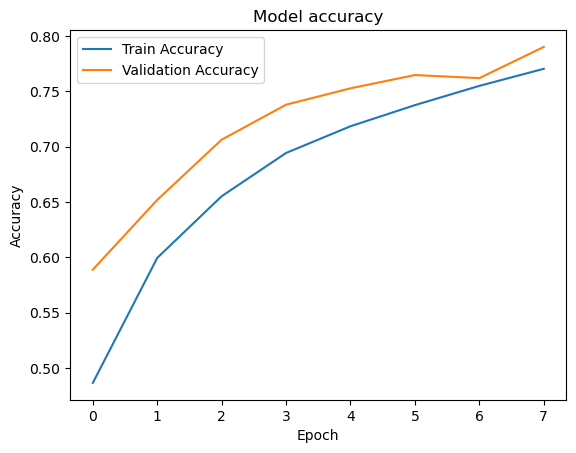

In [140]:
sns.lineplot(data=history_df,
             x=history_df.index,
             y='accuracy',
             label="Train Accuracy")

sns.lineplot(data=history_df,
             x=history_df.index,
             y='val_accuracy',
             label="Validation Accuracy")

plt.title('Model accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend()

plt.show()

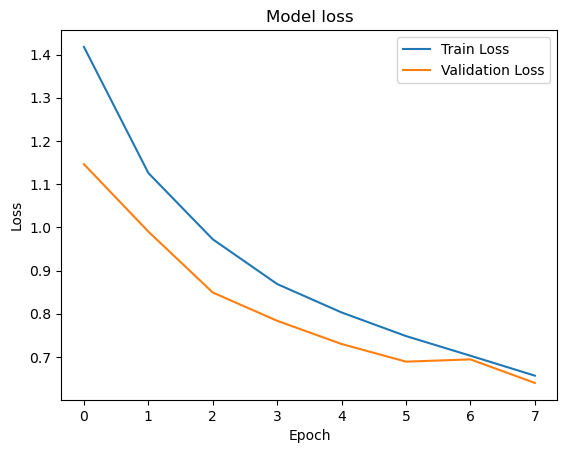

In [141]:
sns.lineplot(data=history_df,
             x=history_df.index,
             y='loss',
             label="Train Loss")

sns.lineplot(data=history_df,
             x=history_df.index,
             y='val_loss',
             label="Validation Loss")

plt.title('Model loss')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()

plt.show()